
## Using Monte-Carlo methods in Python to solve the Empire State Stairs probability puzzle

Let's set up an interesting problem involving probabilities, inspired by the DataCamp Course: [Intermediate Python](https://campus.datacamp.com/courses/intermediate-python)

The problem is a game, with the following rules:

1. Your begin on the bottom floor of the empire state building. 
2. 100 times, you role a fair six-sided dice. Each time you roll the dice, you take an action, based on the value that you roll:
 - Dice = 1 or 2: You go down a step down (or stay on the bottom floor)
 - Dice = 3, 4 or 5: You go up one floor. 
 - Dice = 6: You throw the dice again, and then go up as many floors as the number that you rolled. 

Also, each round, there is a 10% chance that you will go to the bottom floor. 

The problem: What is the probability of reaching the 60th floor by the end of the 100 dice rolls?

Here, I solve the problem using the 'hacker statistics' method. 

The 'hacker' statistics method is essentially monte-carlo simulation. We simulation the game many times, and count the proportion of times we reach the 60th floor or above by the end. 



## The 'hacker' statistics method

First, we import a module we need to create random numbers: `numpy`, specifically the sub module `random`.

In [413]:
import numpy as np

For each round of the game, we have event sample space of $\{1,2,3,4,5,6\}$, each of which occurs with probability $\frac{1}{6}$.

We can therefore define our random event space with a function:








In [414]:
def dice() :
    return(np.random.randint(1,7))

In [415]:
dice()

3

Next we want to define the mapping between these random events (the dice rolls) and our position on the staircase. 

Again, a function is the right tool here. The function will take the random event, and current step as input, and then return the change in step position that occurs in that round of the game.    

In [416]:
# This function takes a random dice roll and current step as input, and return the relative change in step position. 
def play_one_round(event, current_step) :
    # with a 10% probability,  we return to the bottom of the stairs
    if np.random.random() < 0.1 :
        return(-current_step)
    # If we roll a 1 or a 2, we go down one step (or stay on the bottom floor)
    if event == 1 or event == 2 :
        if current_step != 0 :
            return(-1)
        else :
            return(0)
    # If we roll 3, 4 or 5, we go one step up
    if event == 3 or event == 4 or event == 5 :
        return(1)
    # If we roll a 6, then we roll another dice and go up that many steps
    if event == 6 :
        return(dice())
    
    
    

In [417]:
play_one_round(dice(), 5)

-1

Now that we have the mechanics of each game defined, we will want a framework to simulate a full game, and to record the results. The structure we will use is a pandas data frame, with the time series of each step position defined as a column. This will allow us to calculate the answer to the problem, and to plot the time series of each simulation. 

In [418]:
import pandas as pd

In [419]:
results_sim_dict = {
    "round" : np.arange(100)
}

results_sim_df = pd.DataFrame(results_sim_dict)

for game in range(5000) :
    current_step = 0 
    for i in results_sim_df.loc[:,"round"] :
       # print(str(i))
        current_step = current_step + play_one_round(dice(), current_step)
        results_sim_df.loc[i, ( "game " + str(game) )] = current_step


#print(results_sim_df)
#print(results_sim_df.index)
#print(results_sim_df.columns)
#print(type(results_sim_df))

In [420]:
print(results_sim_df)

round  game 0  game 1  game 2  game 3  game 4  game 5  game 6  game 7  \
0       0     1.0     0.0     1.0     1.0     1.0     0.0     1.0     1.0   
1       1     2.0     1.0     2.0     0.0     0.0     0.0     0.0     2.0   
2       2     3.0     0.0     3.0     0.0     1.0     2.0     0.0     0.0   
3       3     2.0     2.0     4.0     1.0     2.0     5.0     0.0     1.0   
4       4     6.0     3.0     3.0     0.0     1.0     4.0     1.0     2.0   
5       5     7.0     2.0     4.0     0.0     7.0     5.0     0.0     3.0   
6       6    12.0     8.0     5.0     1.0     6.0     6.0     5.0     4.0   
7       7     0.0    13.0     4.0     0.0     7.0     5.0     6.0     5.0   
8       8     1.0    12.0     0.0     1.0    13.0     6.0    10.0     4.0   
9       9     2.0    13.0     0.0     4.0    14.0     0.0    11.0     5.0   
10     10     3.0    15.0     4.0     3.0    20.0     1.0    10.0     4.0   
11     11     0.0    16.0     0.0     4.0    21.0     2.0    15.0     3.0   
12 

Having run the 1000 simulations, we can start with a histogram of the distribution of final positions, to explore the typicaly ending positions for the game. 

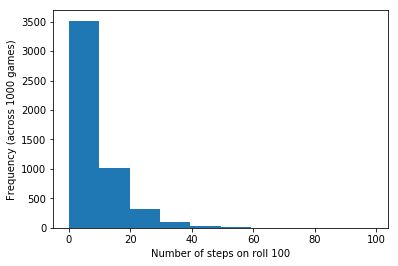

In [421]:
import matplotlib.pyplot as plt
plt.hist(results_sim_df.loc[99,:])
plt.xlabel("Number of steps on roll 100")
plt.ylabel("Frequency (across 1000 games)")
plt.show()

Interestingly, we can see that most games finish well below 60 steps. This is almost certainly a consequence of the lethal 10% chance of returning to the bottom step. 

We can build a plot of the 'random walks' for the first ten games to visualise this process. 

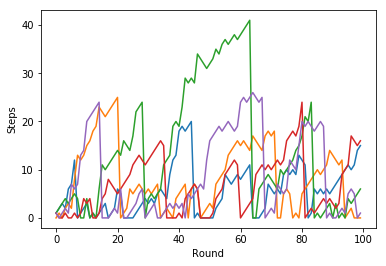

In [422]:
for game in range(5) :
    plt.plot(results_sim_df.loc[:,"round"], results_sim_df.loc[:, ( "game " + str(game) )])
    plt.xlabel("Round")
    plt.ylabel("Steps")
plt.show()

Finally, to answer our question, we need to calculate the proportion of games in which the player reached the 60th step or above atleast once. 

In [426]:
count_achieved_60th = []

for col_name, col_data in results_sim_df.iloc[:,1:100].iteritems() :
    count_achieved_60th.append(np.any(col_data.values > 60))


In [427]:
print(count_achieved_60th)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


The estimates probability of reaching the 60th floor or above is therefore as follows:

In [428]:
print(sum(count_achieved_60th) / 5000)

0.0004
